In [24]:
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

# Esto es para que no me aparezcan los warnings cuando ejecuto los modelos
import warnings
warnings.filterwarnings("ignore")

## Ejercicio 1
A. Implementar una función que calcule la pendiente y la ordenada al origen de la recta de
regresión lineal con las fórmulas vistas en clase:
$$
 \begin{array}{rl}
      \hat{\beta}_1 = & \dfrac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sum_{i=1}^n(x_i - \bar{x})^2}  \\[1em]
      \hat{\beta}_0 = & \bar{y} - \hat{\beta}_1\bar{x}
 \end{array}
 $$

 donde 
 $$\bar{x} =  \frac{1}{n} \sum_{i=1}^{n}x_i $$
  
 
 $$\bar{y} =  \frac{1}{n} \sum_{i=1}^{n}y_i$$ 


In [3]:
def coefs_rl(x, y) -> tuple:
    """
    Calcula los coeficientes de la regresión lineal
    Args: 
        x: np.array or pd.Series
        y: np.array or pd.Series
    Returns:
        tuple of floats: `(beta_1, beta_0)` where 
        `beta_1`: coeficiente de la pendiente
        `beta_0`: coeficiente de la ordenada al origen
    """
    x_med = np.mean(x)
    y_med = np.mean(y)
    beta_1 = np.sum((x - x_med)*(y - y_med))/np.sum((x - x_med)**2)
    beta_0 = y_med - beta_1*x_med
    return beta_1, beta_0

b) Con el dataset gapminder, utilizar la función implementada en el item anterior para
realizar una regresión lineal entre los años y la expectiva de vida en Argentina. Comparar
los coeficientes con los obtenidos por scikit-learn

In [4]:
gapminder = pd.read_csv("../_src/Datasets/gapminder.csv")
datos = gapminder[["year","lifeExp"]]

In [21]:
print(coefs_rl(datos["year"],datos["lifeExp"]))

(0.3259038276371516, -585.6521874415444)


Veamos ahora con scikit learn

In [22]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["year"]],datos["lifeExp"])
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_
print(beta_1, beta_0)

0.3259038276371518 -585.6521874415448


### 2. 
### En este ejercicio trabajaremos con el dataset de inmuebles (`inmuebles.csv` en la página dela materia). El dataset contiene datos sobre inmuebles que están a la venta en cierta ciudad:su superficie en m2, su precio en millones de pesos y la zona de la ciudad donde se encuentra. Recordar como cargar un dataset desde un .csv y visualizar sus primeras filas:

In [5]:
datos = pd.read_csv("../_src/Datasets/inmuebles.csv")
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


(a) Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie y el precio de cada imueble

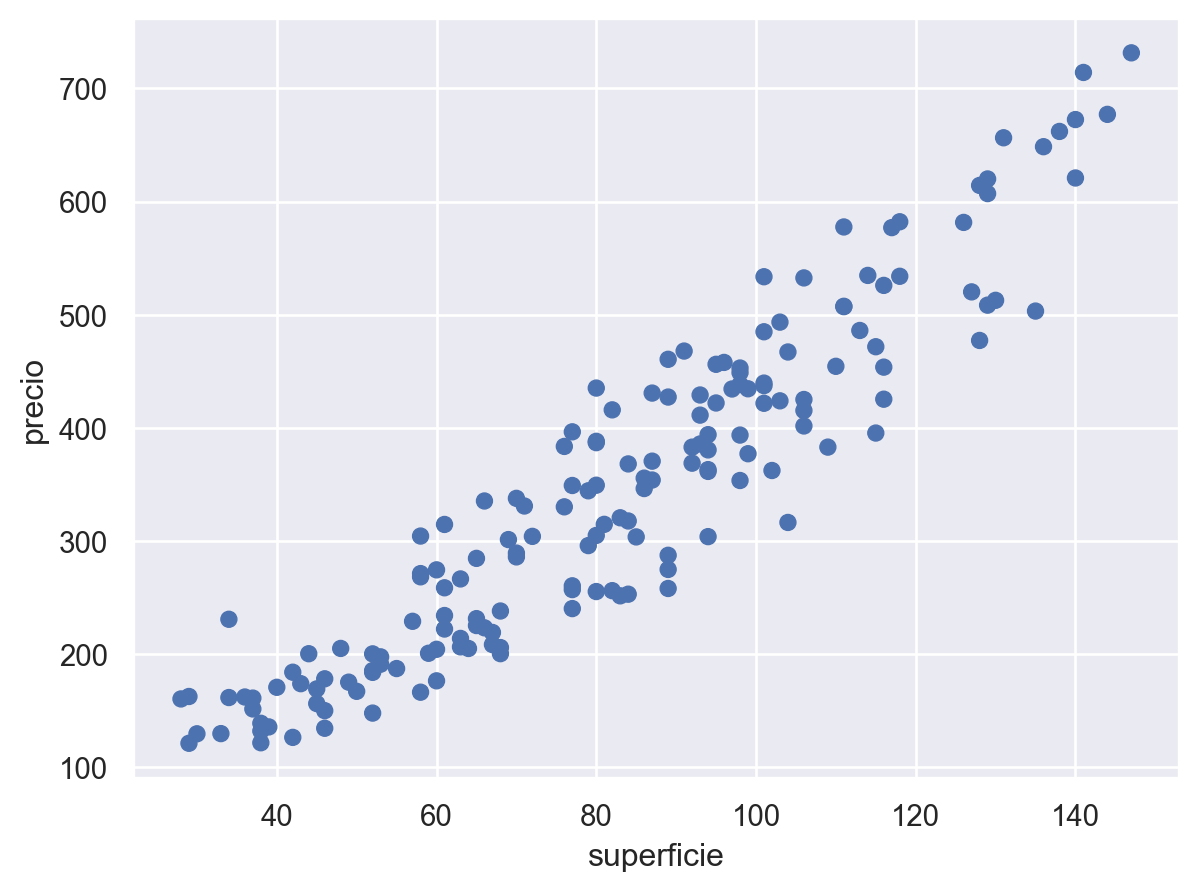

In [24]:
(
    so.Plot(data=datos, x="superficie", y="precio")
    .add(so.Dot())
)

### item b)
 Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse “Datos inmobiliarios” y la recta de Regresión Lineal debe tener una leyenda que diga “Regresión”

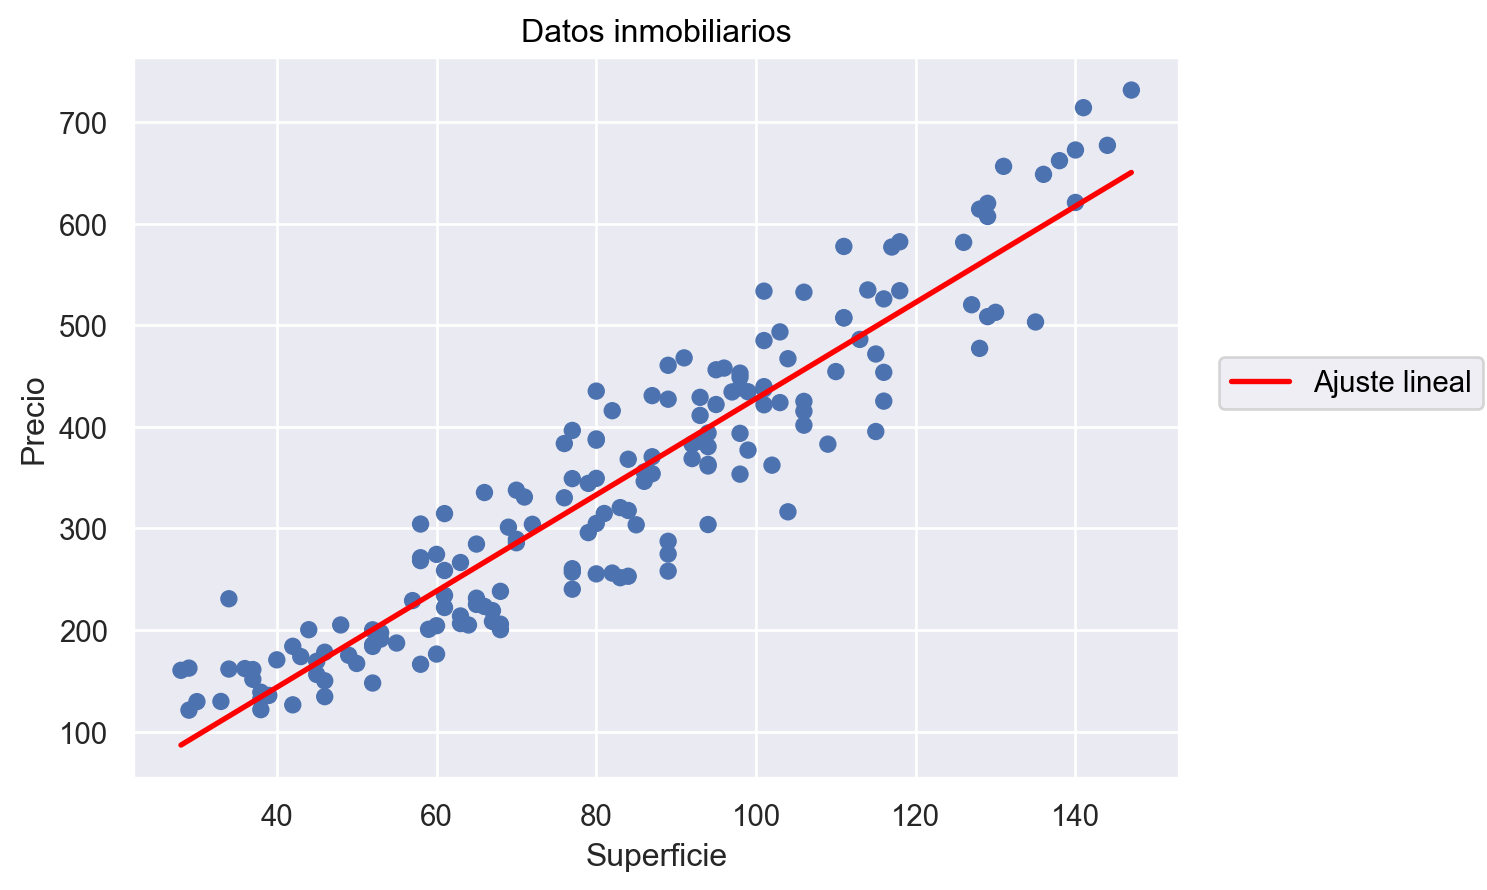

In [18]:
(
    so.Plot(data=datos, x="superficie", y="precio")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1),label="Ajuste lineal")
    .label(title="Datos inmobiliarios", x="Superficie", y="Precio")
)

### item c) 
Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué podríamos interpretar sobre el costo del metro cuadrado en la ciudad?

In [31]:
coefs_rl(datos["superficie"],datos["precio"])

(4.735796822302392, -45.73153403092584)

Bueno, la funcion de la recta que mejor ajusta tiene esta pinta:
$$
Y = - 45.73 + 4.74 \cdot X 
$$

Como el coeficiente de X es positivo entonces podemos decir que a medida que aumenta la superficie tambien aumenta el precio.

In [6]:
beta1,beta0=coefs_rl(datos["superficie"],datos["precio"])
def predict(*x_values):
    predictions = []
    for x in x_values:
        prediction = beta1 * x + beta0
        predictions.append(prediction)
    return predictions

predict(10,20,30)

[1.626434192098074, 48.98440241512199, 96.34237063814592]

### item d) 
Para medir qué tan bien ajusta la recta a los datos, vamos a implementar dos funciones:
una que calcule el error cuadrático medio (ECM) y otra que calcule el coeficiente de
determinación R2
. Recordemos que:
$$
\begin{aligned}
    \text { Error cuadrático medio: } \quad \quad E C M & =\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2 \\

   \text { Coeficiente de determinación: } \quad \quad & R^2=\frac{\sum_{i=1}^n\left(\hat{y}_i-\bar{y}\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}
\end{aligned}
$$

In [7]:
def ecm(x, y, pendiente: float, o_origen: float) -> float:
    """
    Calcula el error cuadrático medio de un modelo de regresión lineal
    Args:
        x: np.array or pd.Series
        y: np.array or pd.Series
        pendiente: float
        o_origen: float
    Returns:
        error_cuadratico: float 
    """
    y_gorrito = o_origen + pendiente*x
    error_cuadratico = np.sum((y - y_gorrito)**2)/len(y)
    return error_cuadratico

def r_cuad(x, y, pendiente: float, o_origen: float) -> float:
    """
    Calcula el coeficiente de determinación de un modelo de regresión lineal
    Args:
        x: np.array or pd.Series
        y: np.array or pd.Series
        pendiente: float
        o_origen: float
    Returns:
        r_2: float
    """
    y_gorrito = o_origen + pendiente*x
    y_med = np.mean(y)
    numerador = np.sum((y_gorrito - y_med)**2)
    denominador = np.sum((y - y_med)**2)
    r_2 = numerador/denominador
    return r_2


### item e) 
Utilizando las funciones implementadas en el ítem anterior, calcular el ECM y el R2 del
ajuste realizado en el item b). ¿En qué unidades está cada medida? ¿Cómo podemos
interpretarlas?


In [8]:
error_cuadratico_medio = ecm(datos["superficie"],datos["precio"],beta1,beta0)
r_2 = r_cuad(datos["superficie"],datos["precio"],beta1,beta0)

print(f"Error cuadrático medio: {round(error_cuadratico_medio,2
                                       )}, \nCoeficiente de determinación: {round(r_2,2)}")

Error cuadrático medio: 2630.93, 
Coeficiente de determinación: 0.88


El ecm es cuanto los valores predichos se desvian de los valores reales. Como el valor predicho es en pesos o dolares entonces el ecm da un valor en $ pesos^2 $ o $dolares^2$

No se muy bien que seria

### item f)
Comparar los resultados obtenidos en el ítem anterior con los proporcionados por r2_score
y mean_squared_error de scikit-learn

In [63]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["superficie"]],datos["precio"])
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_
print(beta_1, beta_0)

4.73579682230239 -45.73153403092567


In [69]:
print("Error cuadratico: ",mean_squared_error(datos["precio"],modelo.predict(datos[["superficie"]])))
print("R^2: ",r2_score(datos["precio"],modelo.predict(datos[["superficie"]])))

Error cuadratico:  2630.9300019446955
R^2:  0.8762114698357936


Son iguales jeje

### item g)
Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad
de precios. ¿Hay algún outlier?

In [70]:
datos.columns

Index(['superficie', 'precio', 'zona'], dtype='object')

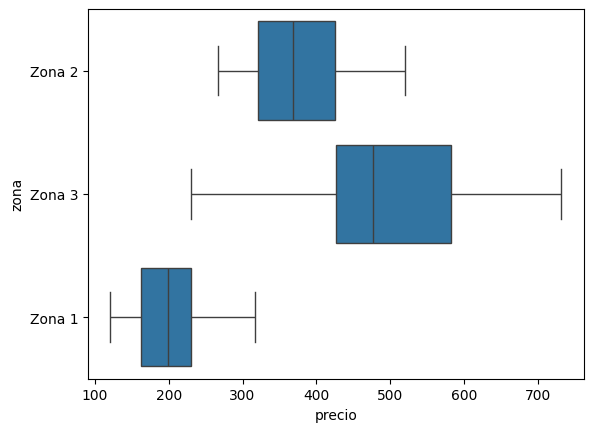

In [74]:
sns.boxplot(data=datos, y="zona", x="precio")
plt.show()

No hay ningun punto fuera de los bigotes asique creo que no hay ningun outlier

### item h)
Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta que mejor aproxima a los datos

In [8]:
zona_1 = datos[datos["zona"] == "Zona 1"]
zona_2 = datos[datos["zona"] == "Zona 2"]
zona_3 = datos[datos["zona"] == "Zona 3"]

modelo_zona_1 = linear_model.LinearRegression()
modelo_zona_1.fit(zona_1[["superficie"]],zona_1["precio"])
beta1_zona_1 = modelo_zona_1.coef_[0]
beta0_zona_1 = modelo_zona_1.intercept_

modelo_zona_2 = linear_model.LinearRegression()
modelo_zona_2.fit(zona_2[["superficie"]],zona_2["precio"])
beta1_zona_2 = modelo_zona_2.coef_[0]
beta0_zona_2 = modelo_zona_2.intercept_

modelo_zona_3 = linear_model.LinearRegression()
modelo_zona_3.fit(zona_3[["superficie"]],zona_3["precio"])
beta1_zona_3 = modelo_zona_3.coef_[0]
beta0_zona_3 = modelo_zona_3.intercept_

In [9]:
zonas = ["Zona 1", "Zona 2", "Zona 3"]
for zona in zonas:
    datos_zona = datos[datos["zona"] == zona]
    beta1,beta0 = coefs_rl(datos_zona["superficie"],datos_zona["precio"])
    error_cuadratico_medio = ecm(datos_zona["superficie"],datos_zona["precio"],beta1,beta0)
    r_2 = r_cuad(datos_zona["superficie"],datos_zona["precio"],beta1,beta0)
    print(f"{zona}: beta_1 = {round(beta1,2)}, beta_0 = {round(beta0,2)}")
    print(f"Error cuadrático medio: {round(error_cuadratico_medio,2)}, \nCoeficiente de determinación: {round(r_2,2)} \n")

Zona 1: beta_1 = 2.44, beta_0 = 58.85
Error cuadrático medio: 331.23, 
Coeficiente de determinación: 0.86 

Zona 2: beta_1 = 3.21, beta_0 = 80.73
Error cuadrático medio: 611.5, 
Coeficiente de determinación: 0.87 

Zona 3: beta_1 = 4.56, beta_0 = 24.97
Error cuadrático medio: 748.88, 
Coeficiente de determinación: 0.94 



### item i) 
Graficar los datos y el ajuste lineal de cada zona utilizando el método `facet()` de `Plot()` 

¿Cuál es el valor del metro cuadrado en cada zona? ¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c) ?

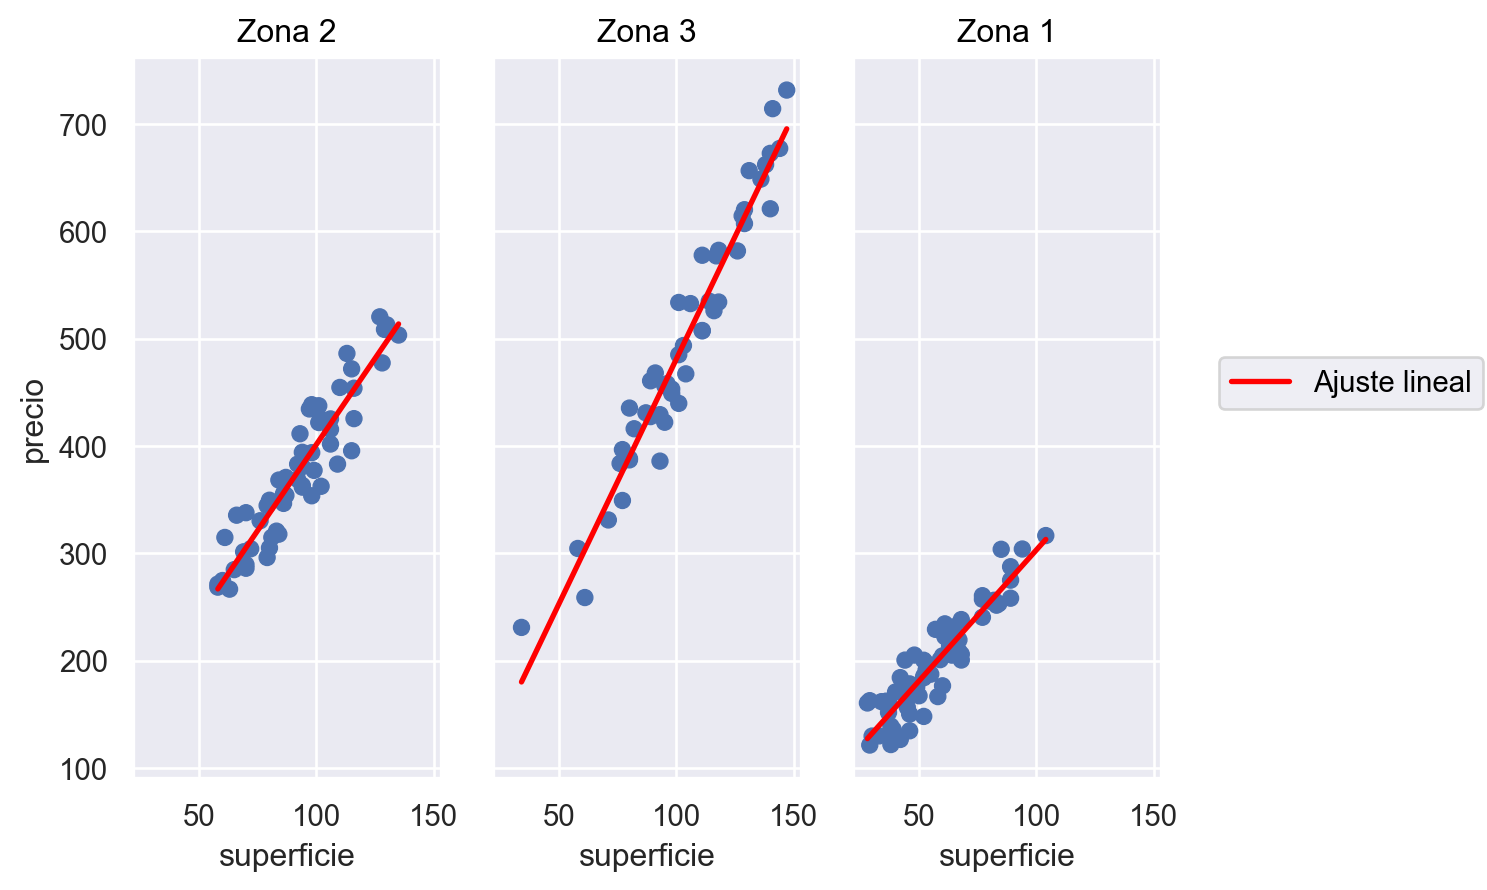

In [14]:
(
    so.Plot(data=datos, x="superficie", y="precio")
    .add(so.Dot())
    .facet(col="zona")
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1),label="Ajuste lineal")
)

In [22]:
print("Metro cuadrado de zona 1: ",modelo_zona_1.predict([[1]])[0])
print("Metro cuadrado de zona 2: ",modelo_zona_2.predict([[1]])[0])
print("Metro cuadrado de zona 3: ",modelo_zona_3.predict([[1]])[0])

Metro cuadrado de zona 1:  61.29408162947443
Metro cuadrado de zona 2:  83.93638825469769
Metro cuadrado de zona 3:  29.52702949532389


Por el grafico podriamos concluir que la zona mas barata en la zona 1. Y que en la zona 3 a medida que aumenta la superficie, mas rapido aumenta el precio

### item j)
Supongamos que queremos poner a la venta un inmueble de 105 $m^2$. Sólo con esa información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo el valor calculado anteriormente?

In [25]:
# Primero lo hacemos sin separar las zonas
modelo = linear_model.LinearRegression()
modelo.fit(datos[["superficie"]],datos["precio"])

print(f"El precio de un inmueble de 105 m2 es: {modelo.predict([[105]])[0]}")

# Ahora lo hacemos sabiendo que es de la zona 2
print(f"El precio de un inmueble de 105 m2 en la zona 2 es: {modelo_zona_2.predict([[105]])[0]}")

El precio de un inmueble de 105 m2 es: 451.5271323108253
El precio de un inmueble de 105 m2 en la zona 2 es: 417.3894041623672


### item k)
 Si me ofrecen un inmueble de 100 m2 en la Zona 2 a un precio de 300, ¿qué tan barato o caro es respecto a su precio de referencia?

In [27]:
print(f"El precio de un inmueble de 100 m2 en la zona 2 es entre {modelo_zona_2.predict([[100]])[0]} y {modelo_zona_2.predict([[100]])[0]+modelo_zona_2.coef_[0]}")


El precio de un inmueble de 100 m2 en la zona 2 es entre 401.3580091668062 y 404.5642881659184


Asique 300 segun nuestro modelo es mas barato que su precio de referencia. COMPRA YA!!! 

### item l) 
***Efecto de los outliers.*** En este item trabajaremos con los datos de inmuebles_outliers.csv, que tiene los mismos datos que inmuebles.csv, salvo cuatro que son outliers. 
1. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outliers.
2. Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos en el ítem h)

In [29]:
datos_outliers = pd.read_csv("../_src/Datasets/inmuebles_outliers.csv")
datos_outliers.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


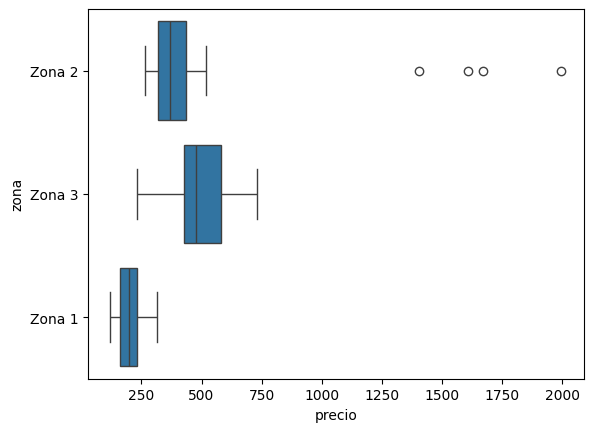

In [31]:
# Ejercicio 1

sns.boxplot(data=datos_outliers, y="zona", x="precio")
plt.show()

Se nota a simple vista que los outliers esta en la zona 2

In [41]:
zona_2_outliers = datos_outliers[datos_outliers["zona"] == "Zona 2"]
modelo_zona_2_outliers = linear_model.LinearRegression()
modelo_zona_2_outliers.fit(zona_2_outliers[["superficie"]],zona_2_outliers["precio"])
beta1_zona_2_outliers = modelo_zona_2_outliers.coef_[0]
beta0_zona_2_outliers = modelo_zona_2_outliers.intercept_

print(f"Coeficientes de la zona 2 con outliers: \nbeta_1 = {round(beta1_zona_2_outliers,2)}, beta_0 = {round(beta0_zona_2_outliers,2)}\n")
print(f"Coeficientes de la zona 2 sin outliers: \nbeta_1 = {round(beta1_zona_2,2)}, beta_0 = {round(beta0_zona_2,2)}")

Coeficientes de la zona 2 con outliers: 
beta_1 = 4.27, beta_0 = 72.89

Coeficientes de la zona 2 sin outliers: 
beta_1 = 3.21, beta_0 = 80.73


Al tener los outliers y ser mayores, el coeficiente relacionado a la pendiente es mayor. Por lo que hace que la recta sea mas pronunciada 

## Ejercicio 3

En el archivo `bitcoin.csv` se encuentran datos de cotizacion de Bitcoin desde el 17/09/2014 hasta el 19/02/2022 1. Cargamos el dataset: 
```bash
btc = pd.read_csv('datos/bitcoin.csv') 
btc.head()
``` 

Nos interesa analizar la evolución del precio de cierre (***Close***) en periodo comprendido entre el 01/01/2021 y el 01/07/2021: 
```bash
# Nos aseguramos que pandas interprete la fecha correctamente 
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d') 
# Filtramos el dataset en el periodo de interes 
btc_2021 = btc[ (btc['Date']>"2021-01-01") & (btc['Date']<"2021-07-01") ]
```

Visualizar el ajuste lineal para los datos del dataframe `btc_2021`. En este caso, ¿resulta más conveniente un scatterplot o un gráfico de lineas para los datos? ¿Te resultaría útil utilizar esta recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?

In [44]:
btc = pd.read_csv('../_src/Datasets/bitcoin.csv') 
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [45]:
# Nos aseguramos que pandas interprete la fecha correctamente 
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d') 
# Filtramos el dataset en el periodo de interes 
btc_2021 = btc[(btc['Date']>"2021-01-01") & (btc['Date']<"2021-07-01")]

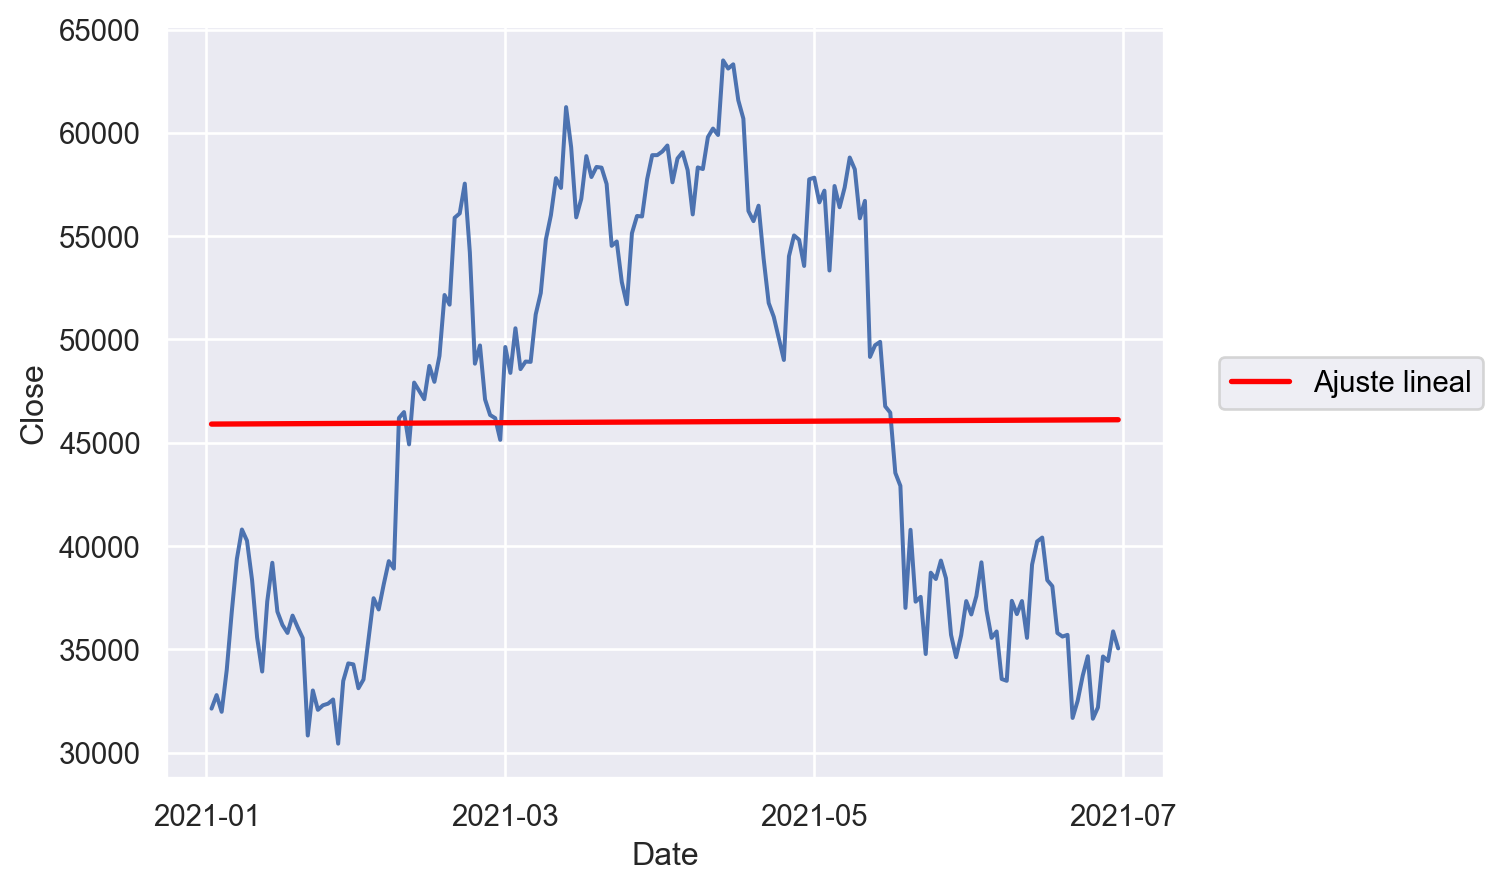

In [56]:
(
    so.Plot(data=btc_2021, x="Date", y="Close")
    .add(so.Line())
    # .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(1),label="Ajuste lineal")
)

### Ejercicio 4

Utilizando el dataset tips de seaborn

``` bash
datos = sns.load_dataset("tips")
```
realizar la Regresión Lineal donde la variable X es `total_bill` menos el promedio de `total_bill` y la variable Y es `tip`. 

Responder las siguientes preguntas: 

(a) ¿Qué interpretación se le puede dar a $\beta_0$? Pista: calcular el promedio de las propinas. 

(b) ¿Cambia el valor de $\beta_1$ respecto a la Regresión Lineal de `total_bill` vs. `tip`?


In [57]:
datos = sns.load_dataset("tips")
datos.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
datos["X"] = datos["total_bill"]-np.mean(datos["total_bill"])

modelo = linear_model.LinearRegression()
modelo.fit(datos[["X"]],datos["tip"])
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_

print(f"beta_1 = {round(beta_1,2)}\nbeta_0 = {round(beta_0,2)}")

beta_1 = 0.11
beta_0 = 3.0


In [64]:
datos["tip"].mean()

2.99827868852459

In [65]:
modelo = linear_model.LinearRegression()
modelo.fit(datos[["total_bill"]],datos["tip"])
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_

print(f"beta_1 = {round(beta_1,2)}\nbeta_0 = {round(beta_0,2)}")

beta_1 = 0.11
beta_0 = 0.92


### Ejercicio 5
En este ejercicio utilizaremos el dataset `healthexp` de seaborn, donde se recopila cada año (`Year`) lo que cada país (`Country`) invierte en salud por habitante (`Spending_USD`) y su expectativa de vida (`Life_Expectancy`). 

Nos enfocaremos en los datos de Japón, nuestra variable predictora será `Spending_USD` y la dependiente será `Life_Expectancy`.